<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/Experiments/EXPERIMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testing Various ways to  convert to dxf/svg

##Importing libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##Loading Image

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/dco1.png')

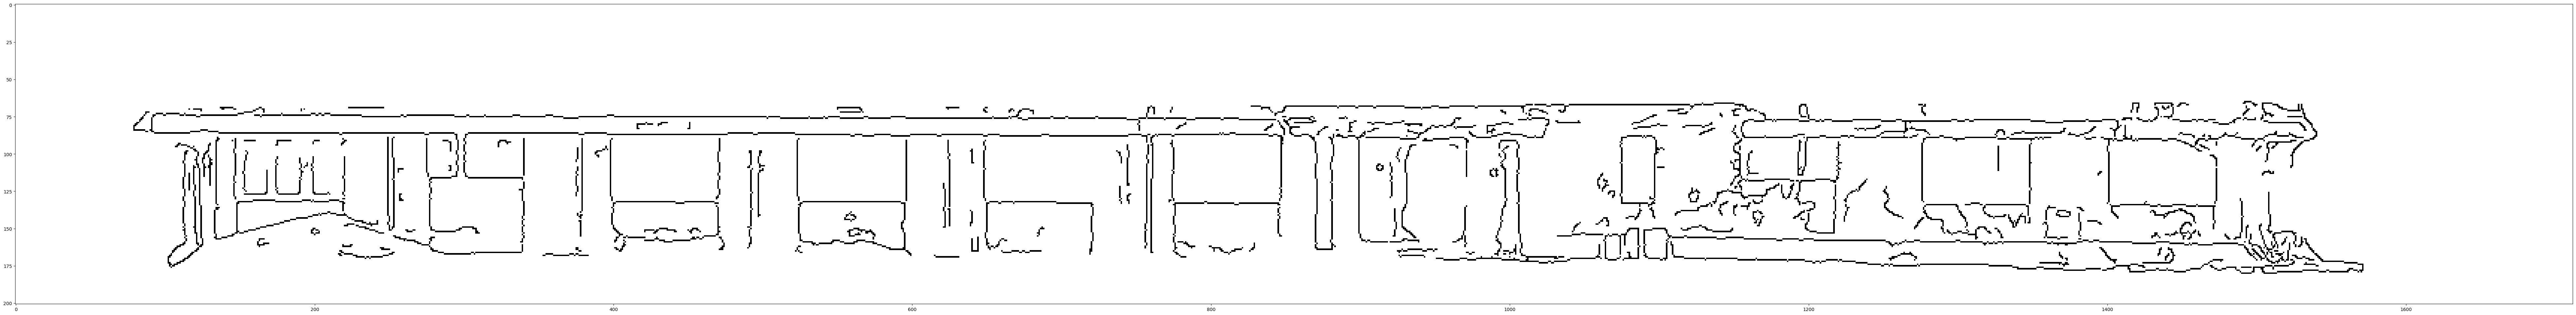

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/dco1.png')

#kernel = np.ones((3,3), np.uint8)
kernel2=np.ones((1,1), np.uint8)
kernel = np.ones((1,1), np.uint8)

a=1
if(a!=0):
  im1=cv2.GaussianBlur(img,(7,7),0)

im1=255-cv2.Canny(im1,70,100)

dilated = cv2.dilate(im1, kernel, iterations=1)

eroded = cv2.erode(im1, kernel, iterations=1)

dilated = cv2.dilate(eroded, kernel2, iterations=1)

# plt.figure(figsize=(100, 50))
# plt.imshow(eroded,cmap='gray')

plt.figure(figsize=(100, 50))
plt.imshow(dilated,cmap='gray')



##Edge Detector 1.1

#Testing Various ways to  convert to dxf/svg

##Detect and Fill Contours in an SVG

In [ ]:
pip install svgwrite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import svgwrite

# Load the image
# image = eroded.copy()
image=dilated.copy()

# Convert to binary (assuming black line on white background)
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create SVG
dwg = svgwrite.Drawing('filled_contours.svg', profile='tiny')

# Fill the contours instead of just outlining them
for contour in contours:
    path_data = "M " + " L ".join(f"{p[0][0]},{p[0][1]}" for p in contour) + " Z"
    dwg.add(dwg.path(d=path_data, fill="black", stroke="none"))  # Filled black shape

dwg.save()
print("SVG saved as filled_contours.svg")


SVG saved as filled_contours.svg


In [ ]:
# Apply erosion to shrink the filled shapes
kernel = np.ones((1,1), np.uint8)  # 3x3 kernel
eroded = cv2.erode(binary, kernel, iterations=3)  # Adjust iterations as needed

# Save the eroded image for debugging
cv2.imwrite("eroded.png", eroded)


True

In [ ]:
# Find contours again after erosion
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a new SVG for the thinned result
dwg = svgwrite.Drawing('thinned_lines.svg', profile='tiny')

# Draw only the thinned (eroded) contours as a line
for contour in contours:
    path_data = "M " + " L ".join(f"{p[0][0]},{p[0][1]}" for p in contour)
    dwg.add(dwg.path(d=path_data, stroke="black", fill="none"))

dwg.save()
print("SVG saved as thinned_lines.svg")


SVG saved as thinned_lines.svg


##Using Skeletonization for Perfect Lines

In [ ]:
from skimage.morphology import skeletonize

# Convert to boolean for skeletonization
eroded_bool = eroded > 0

# Apply skeletonization
skeleton = skeletonize(eroded_bool)

# Convert back to uint8 format for visualization
skeleton = (skeleton * 255).astype(np.uint8)

# Extract line pixels
points = np.column_stack(np.where(skeleton > 0))

# Create SVG with skeletonized paths
dwg = svgwrite.Drawing('skeletonized_lines.svg', profile='tiny')

for i in range(len(points) - 1):
    p1, p2 = points[i], points[i + 1]
    dwg.add(dwg.line(start=(p1[1], p1[0]), end=(p2[1], p2[0]), stroke="black", stroke_width=1))

dwg.save()
print("SVG saved as skeletonized_lines.svg")


TypeError: '1492' is not a valid value for attribute 'x1' at svg-element <line>.

In [ ]:
from skimage.morphology import skeletonize

# Convert to boolean for skeletonization
eroded_bool = eroded > 0

# Apply skeletonization
skeleton = skeletonize(eroded_bool)

# Convert back to uint8 format for visualization
skeleton = (skeleton * 255).astype(np.uint8)

# Extract line pixels
points = np.column_stack(np.where(skeleton > 0))

# Create SVG with skeletonized paths
dwg = svgwrite.Drawing('skeletonized_lines.svg', profile='tiny')

for i in range(len(points) - 1):
    p1, p2 = points[i], points[i + 1]
    dwg.add(dwg.line(start=(p1[1], p1[0]), end=(p2[1], p2[0]), stroke="black", stroke_width=1))

dwg.save()
print("SVG saved as skeletonized_lines.svg")


TypeError: '1492' is not a valid value for attribute 'x1' at svg-element <line>.